## Ch8 AutoEncoder

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('./mnist/data',one_hot=True)

Extracting ./mnist/data\train-images-idx3-ubyte.gz
Extracting ./mnist/data\train-labels-idx1-ubyte.gz
Extracting ./mnist/data\t10k-images-idx3-ubyte.gz
Extracting ./mnist/data\t10k-labels-idx1-ubyte.gz


In [22]:
learning_rate=0.01
training_epoch=20
batch_size=200
n_hidden=256
n_input=28*28

## placeholder

In [10]:
X=tf.placeholder(tf.float32,[None,n_input])

## Variables

### Encoder

In [11]:
W_encode=tf.Variable(tf.random_normal([n_input,n_hidden]))
b_encode=tf.Variable(tf.random_normal([n_hidden]))

encoder=tf.nn.sigmoid(tf.add(tf.matmul(X,W_encode),b_encode))

### Decoder

In [12]:
W_decode=tf.Variable(tf.random_normal([n_hidden,n_input]))
b_decode=tf.Variable(tf.random_normal([n_input]))
decoder=tf.nn.sigmoid(tf.add(tf.matmul(encoder,W_decode),b_decode))

## Cost functions & Optimizer

In [25]:
cost=tf.reduce_mean(tf.pow(X-decoder,2))
optimizer=tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

## Learning Process

In [ ]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

total_batch=int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost=0
    
    for jmi in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        _,cost_val=sess.run([optimizer,cost],feed_dict={X:batch_xs})
        total_cost+=cost_val

    print('Epoch:','%04d'%(epoch+1),'Avg.cost=','{:.4f}'.format(total_cost/total_batch))
    
print('The optimization has done!')

Epoch: 0001 Avg.cost= 0.3144
Epoch: 0002 Avg.cost= 0.0818
Epoch: 0003 Avg.cost= 0.0645
Epoch: 0004 Avg.cost= 0.0554
Epoch: 0005 Avg.cost= 0.0503
Epoch: 0006 Avg.cost= 0.0470
Epoch: 0007 Avg.cost= 0.0456
Epoch: 0008 Avg.cost= 0.0432
Epoch: 0009 Avg.cost= 0.0419
Epoch: 0010 Avg.cost= 0.0408
Epoch: 0011 Avg.cost= 0.0400


## Check

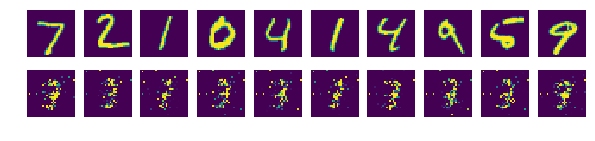

In [24]:
sample_size=10
samples=sess.run(decoder,feed_dict={X:mnist.test.images[:sample_size]})

fig,ax=plt.subplots(2,sample_size,figsize=(sample_size,2))

for jmi in range(sample_size):
    ax[0][jmi].set_axis_off()
    ax[1][jmi].set_axis_off()
    ax[0][jmi].imshow(np.reshape(mnist.test.images[jmi],(28,28)))
    ax[1][jmi].imshow(np.reshape(samples[jmi],(28,28)))
    